In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
os.chdir("F://buffalo//buffalo project//churn financial habit")
data=pd.read_csv("churn_data.csv")

In [53]:
data.describe()
data.tail()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
26995,24291,1,24.0,R,580.0,0,0,0,0,0,...,0,0,0,0,Leo,0,0,32.0,1.07,1
26996,4116,1,26.0,na,NaN,0,0,2,0,0,...,0,0,0,1,Cancer,1,0,2.0,0.67,0
26997,23740,0,22.0,na,NaN,0,0,37,0,0,...,0,0,0,0,Taurus,0,0,28.0,0.93,0
26998,47663,1,46.0,na,529.0,2,0,16,2,0,...,0,0,0,0,Aries,1,0,27.0,0.90,1
26999,52752,1,34.0,na,525.0,0,0,4,0,0,...,0,0,0,0,Cancer,0,0,4.0,0.13,0


In [54]:
data.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

# cleaning data

In [55]:
data=data[pd.notnull(data['age'])]
data=data.drop(columns=['credit_score','rewards_earned'])

 # Histogram

ValueError: color kwarg must have one color per dataset

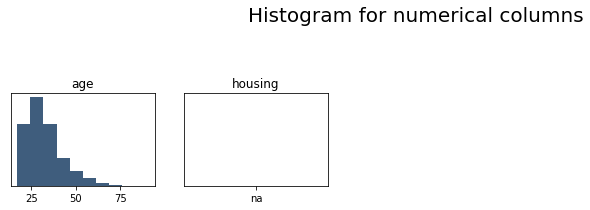

In [56]:
data2=data.drop(columns=["user","churn"])
fig = plt.figure(figsize=(15,12))
plt.suptitle("Histogram for numerical columns",fontsize=20)
for i in range(1,data2.shape[1]+1):
    plt.subplot(6,5,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data2.columns.values[i-1])
    vals=np.size(data2.iloc[:,i-1].unique())
    plt.hist(data2.iloc[:,i-1],color="#3F5D7D")

plt.tight_layout(rect=[0,0.3,0.95,2])


# Data Prep


In [57]:
user_iden=data["user"]
data=data.drop(columns=['user'])


# onehot Encoding

In [58]:
data.housing.value_counts()
data=pd.get_dummies(data)
data.columns


Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred', 'housing_O', 'housing_R', 'housing_na',
       'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly', 'payment_type_na',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo',
       'zodiac_sign_na'],
      dtype='object')

# removing corelation by droping trivial columns

In [59]:
data=data.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(columns='churn'),data['churn'],test_size=0.2,random_state=0)

# balancing training set 


In [61]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [62]:
pos_index=y_train[y_train.values==1].index
neg_index=y_train[y_train.values==0].index

if  len(pos_index)>len(neg_index):
    higher=pos_index
    lower=neg_index
else:
    lower=pos_index
    higher=neg_index

higher = np.random.choice(higher,size=len(lower))
lower=np.asarray(lower)
new_indexes=np.concatenate((lower,higher))



In [63]:
X_train=X_train.loc[new_indexes,]

y_train=y_train[new_indexes]
y_train.value_counts()

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train2=pd.DataFrame(sc_x.fit_transform(X_train))
X_test2=pd.DataFrame(sc_x.transform(X_test))
X_train2.columns=X_train.columns.values
X_test.columns=X_test.columns.values
X_train2.index=X_train.index.values
X_test.index=X_test.index.values
X_train=X_train2
X_test=X_test2

# Model Building

In [95]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

# Evaluating model

In [97]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.74      0.52      0.61      3166
          1       0.52      0.74      0.61      2234

avg / total       0.65      0.61      0.61      5400



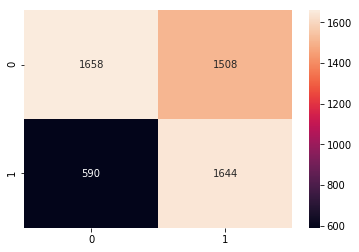

In [101]:
sns.heatmap(cm,annot=True,fmt='g')

print(classification_report(y_test,y_pred))

# apply k fold 

In [107]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=classifier,
                    X=X_train,
                    y=y_train,
                    cv=10)
acc

0.6416107382550337

In [ ]:
acc.mean()

# Analyzing coeff

In [111]:
pd.concat([pd.DataFrame(X_train.columns,columns=["features"]),
          pd.DataFrame(np.transpose(classifier.coef_),columns=["coef"])],axis=1)

,features,coef
0,age,-0.176311
1,deposits,0.483648
2,withdrawal,0.042988
3,purchases_partners,-0.685545
4,purchases,-0.625087
5,cc_taken,0.076884
6,cc_recommended,0.075706
7,cc_disliked,-0.014717
8,cc_liked,-0.019064
9,cc_application_begin,0.026687


# Feature Selection 

In [114]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
rfe=RFE(classifier,20)
rfe=rfe.fit(X_train,y_train)


In [115]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_two_month_plus', 'reward_rate', 'housing_O',
       'payment_type_Weekly', 'zodiac_sign_Capricorn'],
      dtype='object')

In [116]:
rfe.ranking_ # all the 1st are imp and 21 i 2 ranking

array([ 1,  1,  1,  1,  1,  1,  1, 11,  8,  6, 14,  1,  1,  1,  1,  1,  3,
        1,  1,  1,  1,  5,  1,  4,  1,  2,  9, 20, 10,  1,  7, 18, 17,  1,
       15, 22, 12, 21, 23, 13, 16, 19])

# running models on best features

In [120]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train[X_train.columns[rfe.support_]],y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
y_pred=classifier.predict(X_test[X_test.columns[rfe.support_]])

In [122]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.74      0.52      0.61      3166
          1       0.52      0.74      0.61      2234

avg / total       0.65      0.61      0.61      5400



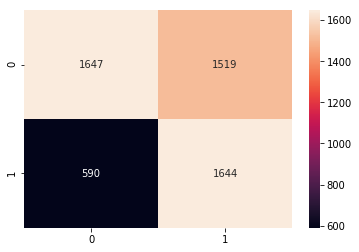

In [123]:
sns.heatmap(cm,annot=True,fmt='g')

print(classification_report(y_test,y_pred))

In [125]:
# what we observed is that using feature selection we reduced it to 20 features 
# getting same results as previous
pd.concat([pd.DataFrame(X_train.columns[rfe.support_],columns=["features"]),
          pd.DataFrame(np.transpose(classifier.coef_),columns=["coef"])],axis=1)

,features,coef
0,age,-0.174829
1,deposits,0.477031
2,withdrawal,0.049065
3,purchases_partners,-0.674956
4,purchases,-0.609385
5,cc_taken,0.077624
6,cc_recommended,0.097129
7,web_user,0.232990
8,app_web_user,-0.090810
9,ios_user,0.132278
